In [785]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

In [786]:
df = pd.read_csv('train.csv', encoding = 'utf-8')

In [787]:
labels = pd.read_csv('labels.csv', encoding = 'utf-8')

In [788]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [789]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [790]:
df.shape

(3999, 42)

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [792]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [793]:
labels.shape

(3999, 1)

In [794]:
labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [795]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [796]:
#One Hot encoding
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [797]:
print(temp.shape)

(3999, 2)


In [798]:
temp

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [799]:
6#concatinating features and labels
new = pd.concat([df , labels] , axis = 1)#42 column features and 1 column of label
print(new.shape)

(3999, 43)


<AxesSubplot:>

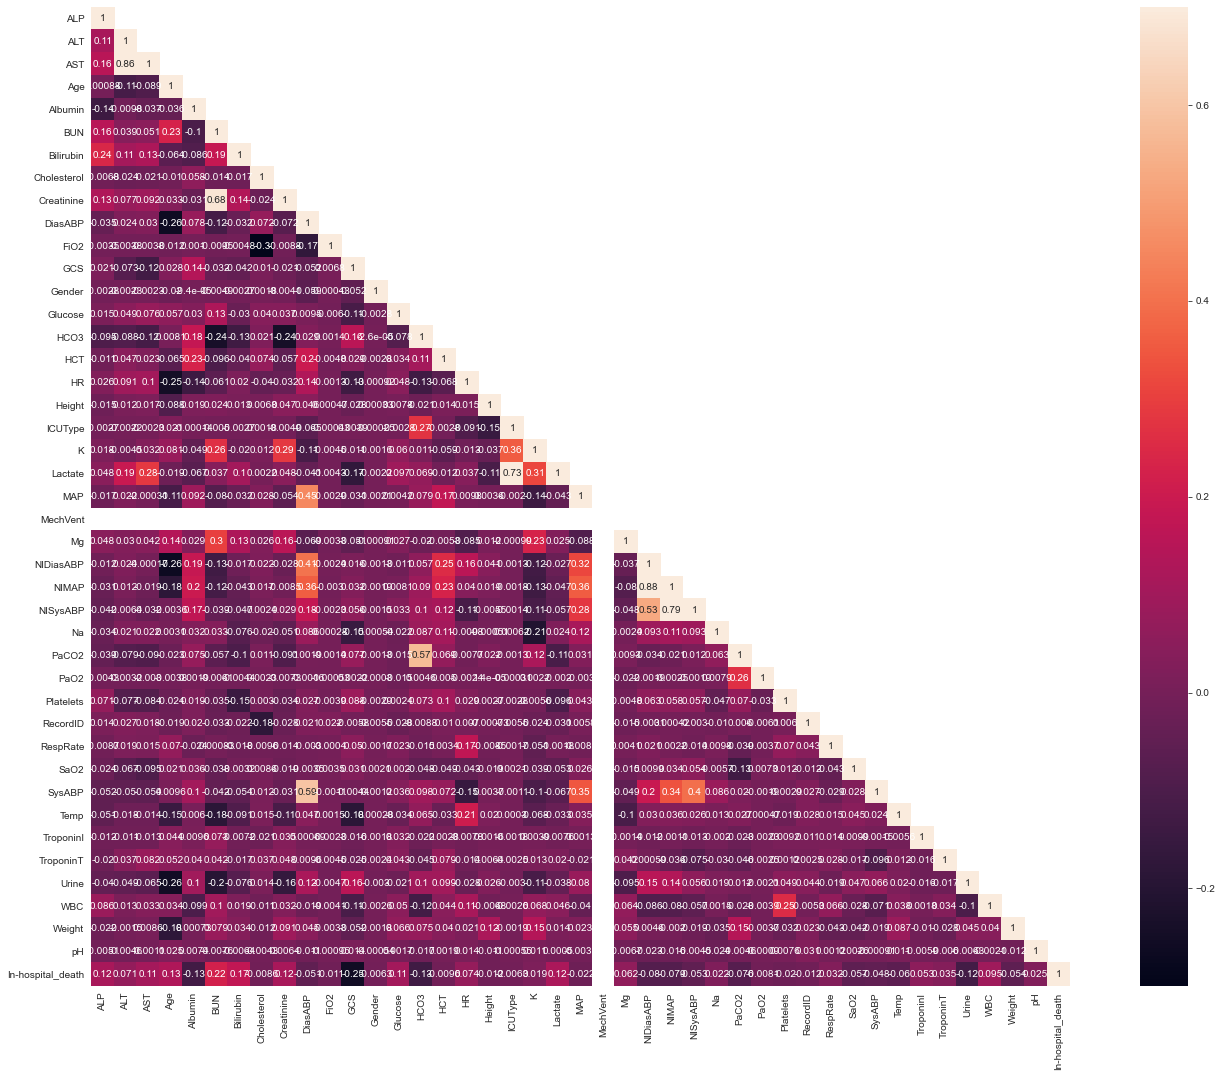

In [800]:
correlation_map = new[new.columns].corr()#correlation
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [801]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [802]:
df = new_df

In [803]:
df = df.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)#remving features that are not co related

**<h3> Scaling Data**

In [804]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

**<H2> Deep Learning Model**

Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [805]:
X = df
y = temp

In [806]:
print(X.shape , y.shape)

(3999, 37) (3999, 2)


# splitting dataset

In [807]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [808]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 37) (800, 37) (3199, 2) (800, 2)


Importing necessary files.

In [809]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop,Adam

# BUILDING ANN model

In [810]:
model = Sequential()#seuential means describing layers in sequence and describe it layer by layer

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu')) #1st layer
model.add(Dense(128, activation='relu'))# rectified linear activation unit # ales out as input in further-----
#---layers so no need to input_dim
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))



model.add(BatchNormalization())#used to standardize inputs ....deforee after activton of activation function...gives better output

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 64)                2432      
                                                                 
 dense_172 (Dense)           (None, 128)               8320      
                                                                 
 dense_173 (Dense)           (None, 196)               25284     
                                                                 
 dense_174 (Dense)           (None, 196)               38612     
                                                                 
 dense_175 (Dense)           (None, 196)               38612     
                                                                 
 batch_normalization_24 (Bat  (None, 196)              784       
 chNormalization)                                                
                                                     

# fit model

In [811]:
history = model.fit(X_train, y_train , epochs=14 , batch_size = 128 , validation_data=(X_test, y_test))
#fitting model in xtrain y train and validating it on x test and y test

Epoch 1/14
25/25 [==============================] - 1s 8ms/step - loss: 0.4600 - accuracy: 0.8259 - val_loss: 0.5105 - val_accuracy: 0.8950
Epoch 2/14
25/25 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8640 - val_loss: 0.5118 - val_accuracy: 0.8950
Epoch 3/14
25/25 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.8653 - val_loss: 0.5412 - val_accuracy: 0.8950
Epoch 4/14
25/25 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.8668 - val_loss: 0.5051 - val_accuracy: 0.8950
Epoch 5/14
25/25 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8712 - val_loss: 0.5087 - val_accuracy: 0.8950
Epoch 6/14
25/25 [==============================] - 0s 4ms/step - loss: 0.3041 - accuracy: 0.8718 - val_loss: 0.5154 - val_accuracy: 0.8950
Epoch 7/14
25/25 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.8693 - val_loss: 0.4840 - val_accuracy: 0.8950
Epoch 8/14
25/25 [==


# evalutaing performance using accuracy loss and confusion matrix

In [812]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


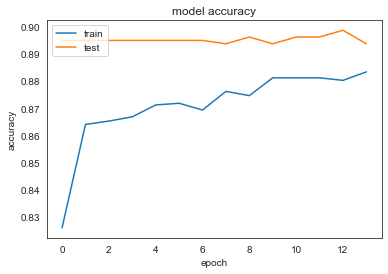

In [813]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])#testing accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

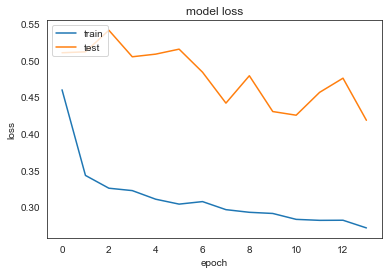

In [814]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])#test loss
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [815]:
from sklearn.metrics import confusion_matrix#confusion metrix is the summary of prediction results in classifiction problems
# no of corect and incorect values are summaried by values and broken down by each class
#prediction
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) #predicted value of y
y_true = np.argmax(y_test,axis = 1)#have orignal y values forgiven x

In [816]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[702  14]
 [ 71  13]]


In [817]:
#[[686   6] #685 true +ve and True -ve correct predictions
# [ 92  16]]# 98 false -ve and 16 false +ve false predictions

In [818]:
print(accuracy_score(y_true,pred))#comparison between y orignal and y predicted

0.89375
